In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 
import pandas as pd
from matplotlib.pyplot import figure
import scipy.stats as stats
import seaborn as sns

In [6]:
df = pd.read_csv("MS_data/LukE_Ligand_smooth40.txt",sep="\t",header=0)
df

,x,y
0,500,370.500
1,500,363.600
2,500,355.500
3,500,347.600
4,500,340.000
...,...,...
306281,8000,6.284
306282,8000,6.284
306283,8000,6.284
306284,8000,6.284


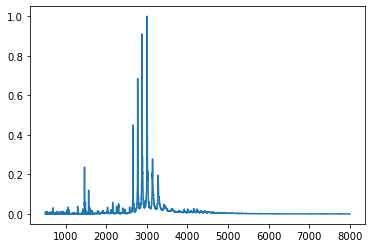

In [7]:
plt.plot(df.x,df.y/max(df.y))
plt.show()

C:\Users\nessl\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


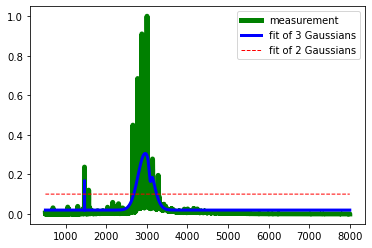

In [16]:
from scipy import optimize

data = df

def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset
def three_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + offset)

def two_gaussians(x, h1, c1, w1, h2, c2, w2, offset):
    return three_gaussians(x, h1, c1, w1, h2, c2, w2, 0,0,1, offset)

errfunc3 = lambda p, x, y: (three_gaussians(x, *p) - y)**2
errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2

guess3 = [0.40, 1350, 100, 1, 2500, 1500, 0.05, 4000,300, 0]  # I guess there are 3 peaks, 2 are clear, but between them there seems to be another one, based on the change in slope smoothness there
guess2 = [0.49, 0.55, 0.01, 1, 0.64, 0.01, 0]  # I removed the peak I'm not too sure about
optim3, success = optimize.leastsq(errfunc3, guess3[:], args=(df.x, df.y/max(df.y)))
optim2, success = optimize.leastsq(errfunc2, guess2[:], args=(df.x, df.y/max(df.y)))
optim3

plt.plot(df.x, df.y/max(df.y), lw=5, c='g', label='measurement')
plt.plot(df.x, three_gaussians(df.x, *optim3),
    lw=3, c='b', label='fit of 3 Gaussians')
plt.plot(df.x, two_gaussians(df.x, *optim2),
    lw=1, c='r', ls='--', label='fit of 2 Gaussians')
plt.legend(loc='best')

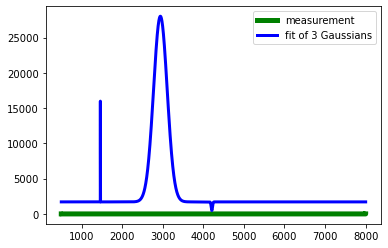

In [21]:
errfunc3 = lambda p, x, y: (three_gaussians(x, *p) - y)**2
#errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2

guess3 = [25000, 1350, 100, 85000, 3000, 1500, 100000, 4000,300, 0]  # I guess there are 3 peaks, 2 are clear, but between them there seems to be another one, based on the change in slope smoothness there
#guess2 = [0.49, 0.55, 0.01, 1, 0.64, 0.01, 0]  # I removed the peak I'm not too sure about
optim3, success = optimize.leastsq(errfunc3, guess3[:], args=(df.x, df.y))
#optim2, success = optimize.leastsq(errfunc2, guess2[:], args=(df.x, df.y/max(df.y)))
#optim3

plt.plot(df.x, df.y/max(df.y), lw=5, c='g', label='measurement')
plt.plot(df.x, three_gaussians(df.x, *optim3),
    lw=3, c='b', label='fit of 3 Gaussians')
#plt.plot(df.x, two_gaussians(df.x, *optim2),
    #lw=1, c='r', ls='--', label='fit of 2 Gaussians')
plt.legend(loc='best')

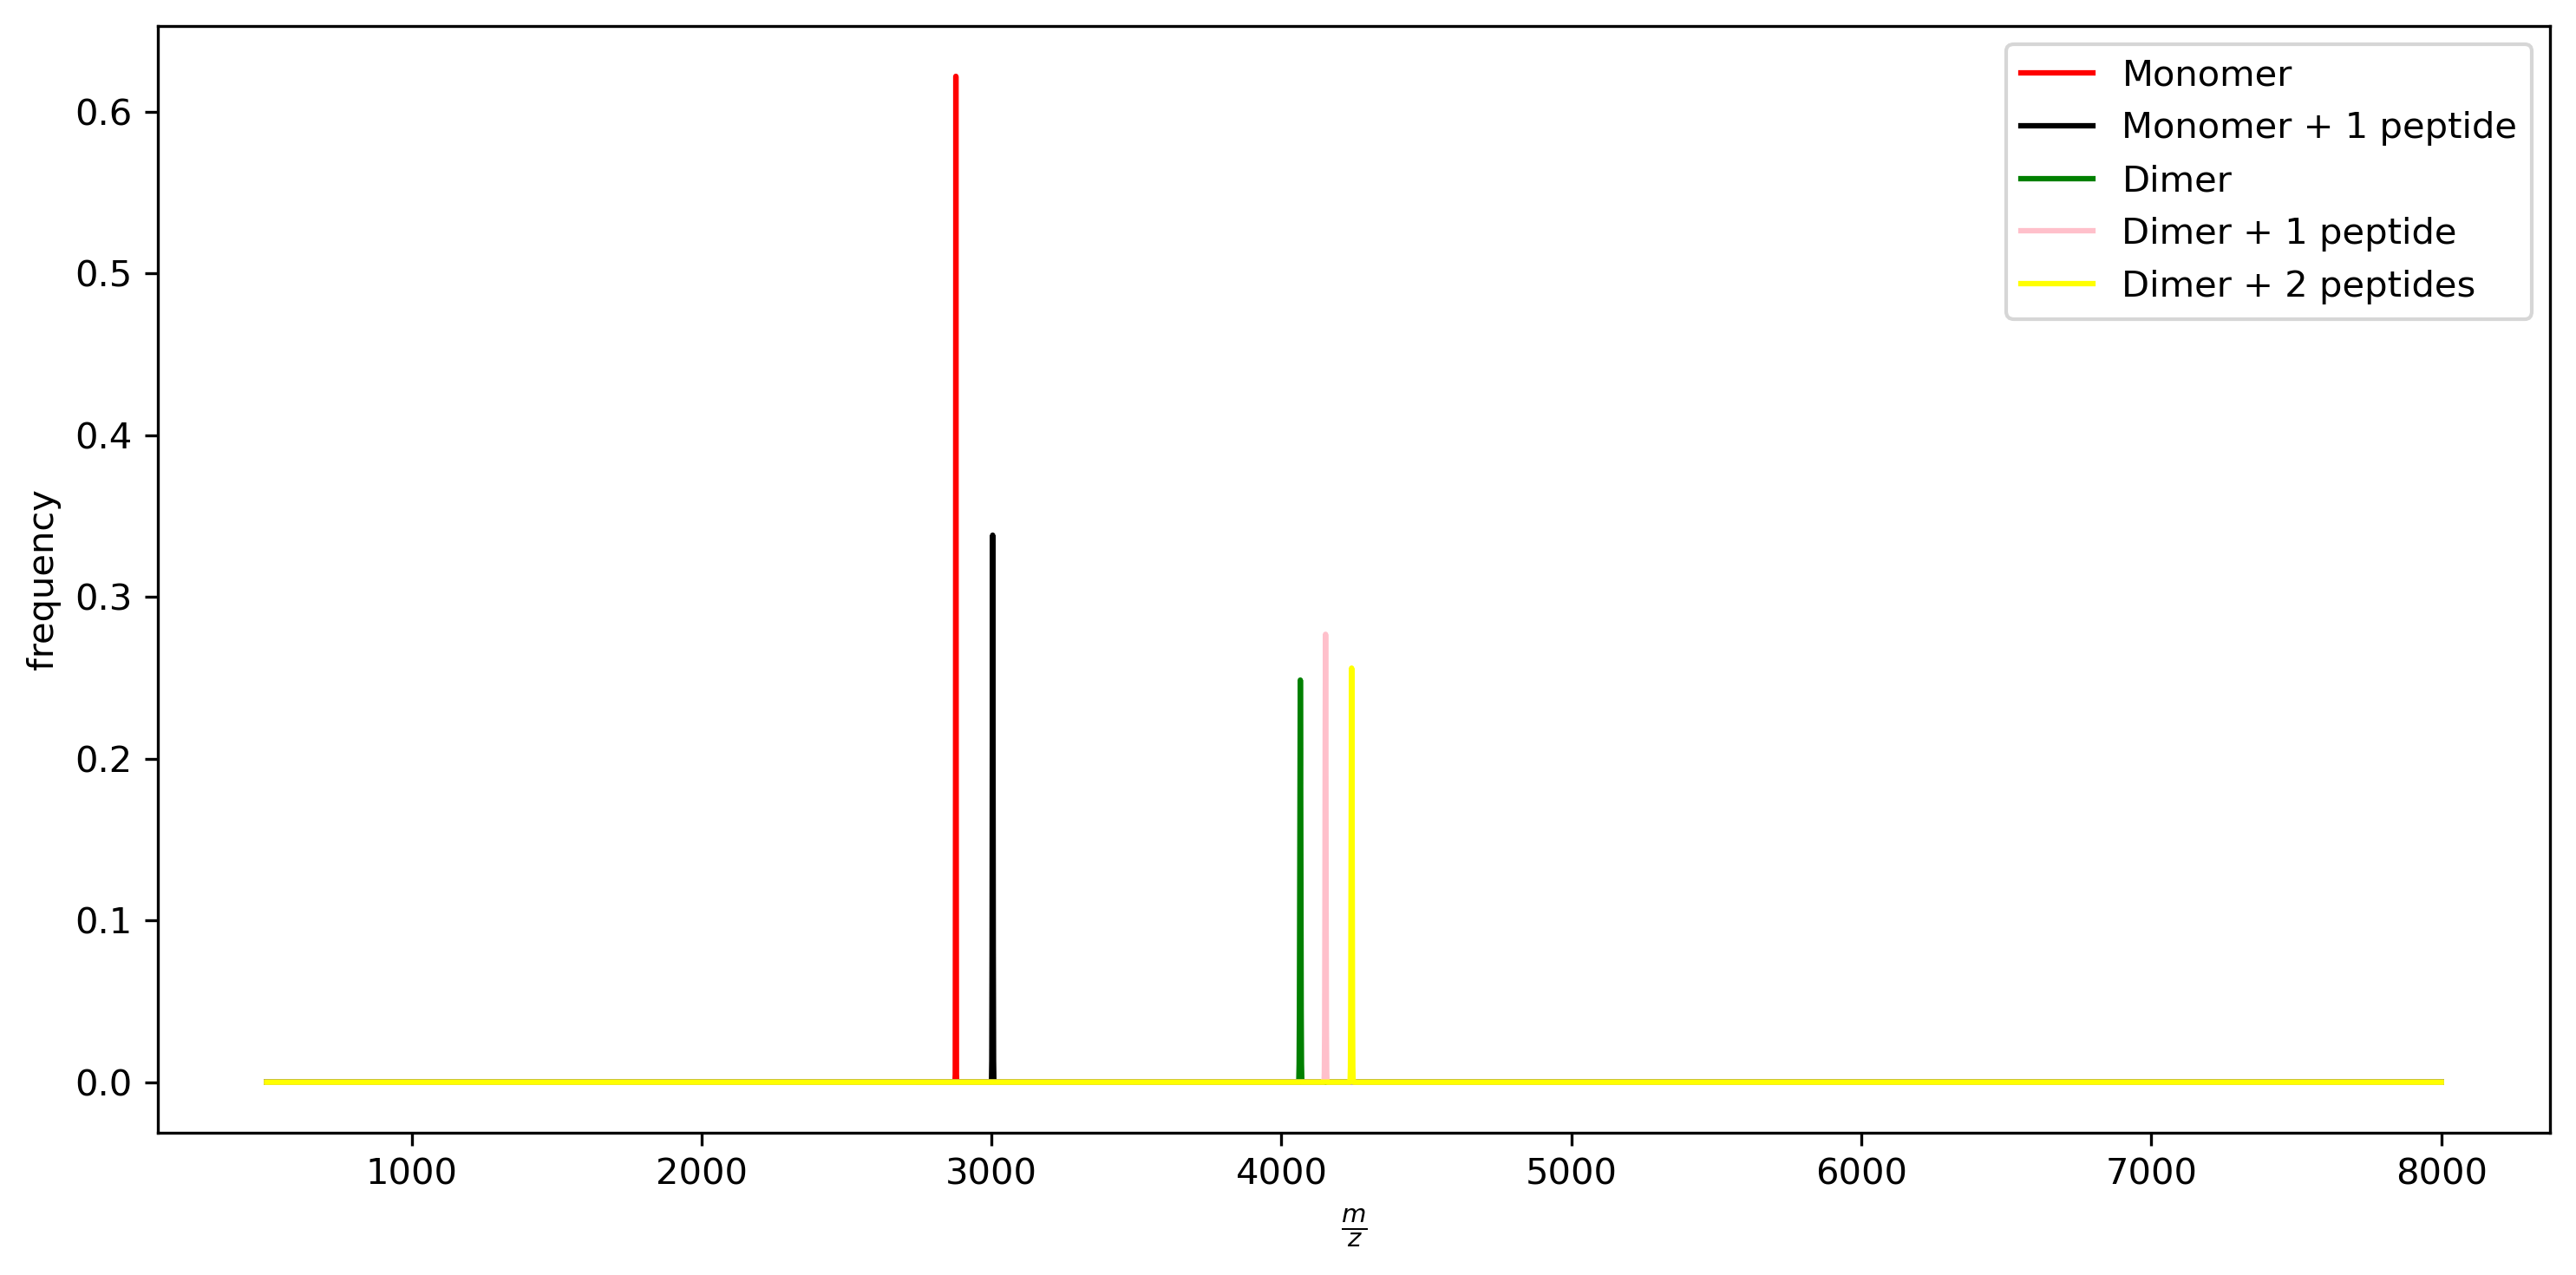

In [15]:
figure(figsize=(10,5), dpi=300)

plt.plot(df.x, stats.norm.pdf(df.x, 2877, 7.7/12 ),color='red',label='Monomer')
plt.plot(df.x, stats.norm.pdf(df.x, 3004, 14.16/12 ),color='black',label='Monomer + 1 peptide')
plt.plot(df.x, stats.norm.pdf(df.x, 4065, 30.5/19 ),color='green',label='Dimer')
plt.plot(df.x, stats.norm.pdf(df.x, 4152, 24.5/17 ),color='pink',label='Dimer + 1 peptide')
plt.plot(df.x, stats.norm.pdf(df.x, 4242, 26.5/17 ),color='yellow',label='Dimer + 2 peptides')
plt.legend()
plt.ylabel('frequency')
plt.xlabel(r'$\frac{m}{z}$')
plt.tight_layout()
plt.savefig('MS_data/plots/all_species.png')
plt.show()

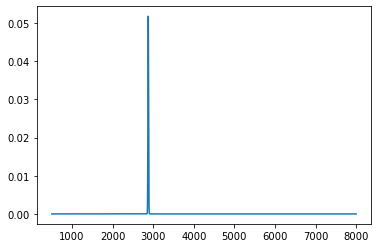

In [46]:
plt.plot(df.x, stats.norm.pdf(df.x, 2877, 7.7 ))

In [34]:
np.random.normal(2877,7.7/12,8000)

array([2876.98013597, 2877.93469826, 2877.58556611, ..., 2876.26977297,
       2877.76948586, 2876.65165808])

In [16]:
df2 = pd.read_csv("Ms_data/CONCA_12uM_smooth50.txt",sep="\t")

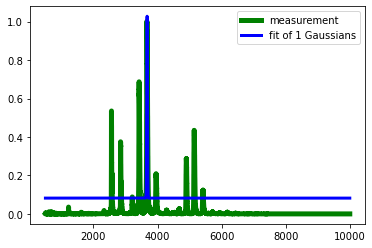

In [21]:
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

errfunc = lambda p, x, y: (gaussian(x, *p) - y)**2

guess = [0.8,3700, 1000, 0]  
optim, success = optimize.leastsq(errfunc, guess[:], args=(df2.x, df2.y/max(df2.y)))

plt.plot(df2.x, df2.y/max(df2.y), lw=5, c='g', label='measurement')
plt.plot(df2.x, gaussian(df2.x, *optim),
    lw=3, c='b', label='fit of 1 Gaussians')
plt.legend(loc='best')
plt.show()

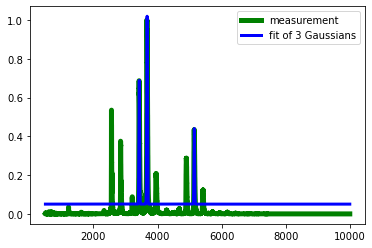

In [23]:
from scipy import optimize

df = df2

def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset
def three_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + offset)

def two_gaussians(x, h1, c1, w1, h2, c2, w2, offset):
    return three_gaussians(x, h1, c1, w1, h2, c2, w2, 0,0,1, offset)

errfunc3 = lambda p, x, y: (three_gaussians(x, *p) - y)**2
#errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2

guess3 = [0.60,2600, 400, 1, 3600, 600, 0.45, 5150,500, 0]  # I guess there are 3 peaks, 2 are clear, but between them there seems to be another one, based on the change in slope smoothness there
#guess2 = [0.49, 0.55, 0.01, 1, 0.64, 0.01, 0]  # I removed the peak I'm not too sure about
optim3, success = optimize.leastsq(errfunc3, guess3[:], args=(df.x, df.y/max(df.y)))
#optim2, success = optimize.leastsq(errfunc2, guess2[:], args=(df.x, df.y/max(df.y)))
optim3

plt.plot(df.x, df.y/max(df.y), lw=5, c='g', label='measurement')
plt.plot(df.x, three_gaussians(df.x, *optim3),
    lw=3, c='b', label='fit of 3 Gaussians')
#plt.plot(df.x, two_gaussians(df.x, *optim2),
   # lw=1, c='r', ls='--', label='fit of 2 Gaussians')
plt.legend(loc='best')

Parameters([('exp_amplitude', <Parameter 'exp_amplitude', value=0.004620797344990523, bounds=[-inf:inf]>), ('exp_decay', <Parameter 'exp_decay', value=2845.34635207963, bounds=[-inf:inf]>)])
[[Model]]
    (((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 649
    # data points      = 353315
    # variables        = 11
    chi-square         = 1253.33369
    reduced chi-square = 0.00354747
    Akaike info crit   = -1993223.32
    Bayesian info crit = -1993104.79
[[Variables]]
    exp_amplitude:  4.2625e-04 +/- 2.0381e-04 (47.82%) (init = 0.004620797)
    exp_decay:     -103982.914 +/- 898135.727 (863.73%) (init = 2845.346)
    g1_amplitude:   19.1210163 +/- 0.32547402 (1.70%) (init = 0.5)
    g1_center:      2699.30794 +/- 3.50521970 (0.13%) (init = 2500)
    g1_sigma:       197.872871 +/- 3.65550203 (1.85%) (init = 150)
    g1

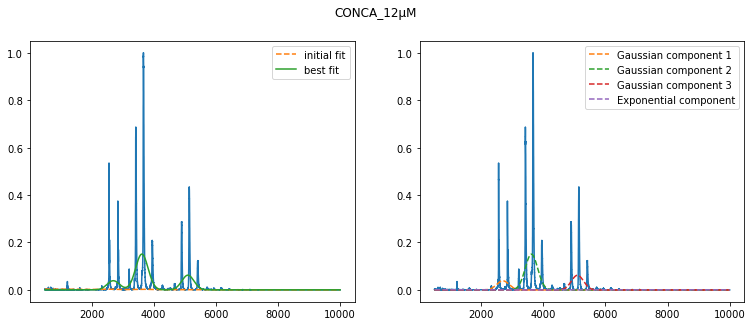

In [34]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import ExponentialModel, GaussianModel

dat = np.loadtxt('MS_data/CONCA_12uM_smooth50.txt')
x = dat[:, 0]
y = dat[:, 1]
y = y/max(y)

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

print(pars)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=2500, min=2400, max=2900)
pars['g1_sigma'].set(value=150, min=100)
pars['g1_amplitude'].set(value=0.5, min=0.3)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=3700, min=3500, max=4000)
pars['g2_sigma'].set(value=250, min=200)
pars['g2_amplitude'].set(value=0.9, min=0.5)

gauss3 = GaussianModel(prefix='g3_')
pars.update(gauss3.make_params())

pars['g3_center'].set(value=5150, min=4900, max=5400)
pars['g3_sigma'].set(value=300, min=170)
pars['g3_amplitude'].set(value=0.4, min=0.3)

mod = gauss1 + gauss2 + gauss3 + exp_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y)
axes[1].plot(x, comps['g1_'], '--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], '--', label='Gaussian component 2')
axes[1].plot(x, comps['g3_'], '--', label='Gaussian component 3')
axes[1].plot(x, comps['exp_'], '--', label='Exponential component')
axes[1].legend()

fig.suptitle('CONCA_12µM')

plt.show()

[[Model]]
    (((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7584
    # data points      = 306286
    # variables        = 11
    chi-square         = 653.492634
    reduced chi-square = 0.00213368
    Akaike info crit   = -1883619.54
    Bayesian info crit = -1883502.59
##  Warning: uncertainties could not be estimated:
    g1_sigma:       at boundary
    g2_center:      at boundary
    g3_center:      at boundary
[[Variables]]
    exp_amplitude: -7.0726e-04 (init = 0.007162105)
    exp_decay:      80910.4134 (init = 3097.307)
    g1_amplitude:   0.59135517 (init = 0.3)
    g1_center:      1464.47989 (init = 1450)
    g1_sigma:       10.0000000 (init = 20)
    g1_fwhm:        23.5482000 == '2.3548200*g1_sigma'
    g1_height:      0.02359166 == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_amplitude:   0.50437938 (i

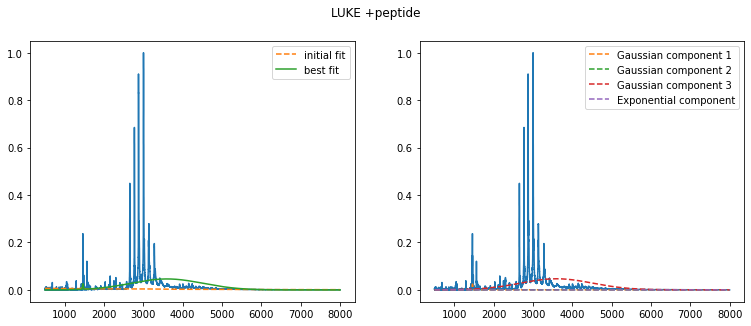

In [44]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import ExponentialModel, GaussianModel

dat = np.loadtxt('MS_data/LukE_Ligand_smooth40.txt')
x = dat[:, 0]
y = dat[:, 1]
y = y/max(y)

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)


gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=1450, min=1300, max=1500)
pars['g1_sigma'].set(value=20, min=10)
pars['g1_amplitude'].set(value=0.3, min=0.1)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=2900, min=2600, max=3200)
pars['g2_sigma'].set(value=350, min=200)
pars['g2_amplitude'].set(value=0.9, min=0.5)

gauss3 = GaussianModel(prefix='g3_')
pars.update(gauss3.make_params())

pars['g3_center'].set(value=4000, min=3600, max=4400)
pars['g3_sigma'].set(value=300, min=170)
pars['g3_amplitude'].set(value=0.1, min=0.04)

mod = gauss1 + gauss2 + gauss3 + exp_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y)
axes[1].plot(x, comps['g1_'], '--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], '--', label='Gaussian component 2')
axes[1].plot(x, comps['g3_'], '--', label='Gaussian component 3')
axes[1].plot(x, comps['exp_'], '--', label='Exponential component')
axes[1].legend()

fig.suptitle('LUKE +peptide')

plt.show()